**Project Planning Stage (Individual) - By Alex Ronczewski (83793521)**

Words: 587 (I tried my best to stay below 500, but with so much to write it was very difficult sorry for being over). 

In [2]:
#Load the necessary libraries and set the matrix max rows to 6. 
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
#Load the dataset into R using the raw file from Github
players <- read_csv("https://raw.githubusercontent.com/Alexr951/DSCI100Project/refs/heads/main/data/players.csv")
players

sessions <- read_csv("https://raw.githubusercontent.com/Alexr951/DSCI100Project/refs/heads/main/data/sessions.csv")
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


**Data Description of Variables**

**Players.csv Variables**

196 Observations and 7 Variables

- experience: Categorical variable indicating the player's experience.
- subscribe: Logical Variable showing if the player is subscribed
- hashedEmail: String representing a hashed email address
- played_hours: Quantitative variable of the number of hours played.
- name: Character String of the player's first name
- gender: Categorical variable indicating the player's gender.
- Age: Quantitative variable representing the player's age.

`Potential issues` 
- Missing values

**Sessions.csv Variables**

1535 Observations and 5 variables

- hashedEmail: String representing a hashed email address
- start_time: Character string representing the start time of a session.
- end_time: Character string representing the end time of a session.
- original_start_time: Numeric variable representing the original start time.
- original_end_time: Numeric variable representing the original end time.

`Potential issues` 
- Missing Values/Duplicates
- Consistency in Time Formats


In [12]:
#sumamry statistics of players
summary(players)

    experience subscribe       hashedEmail         played_hours    
 Amateur :63   Mode :logical   Length:194         Min.   :  0.000  
 Beginner:35   FALSE:52        Class :character   1st Qu.:  0.000  
 Pro     :13   TRUE :142       Mode  :character   Median :  0.100  
 Regular :35                                      Mean   :  5.905  
 Veteran :48                                      3rd Qu.:  0.600  
                                                  Max.   :223.100  
     name                         gender         Age       
 Length:194         Agender          :  2   Min.   : 8.00  
 Class :character   Female           : 37   1st Qu.:17.00  
 Mode  :character   Male             :124   Median :19.00  
                    Non-binary       : 15   Mean   :20.52  
                    Prefer not to say: 11   3rd Qu.:22.00  
                    Two-Spirited     :  5   Max.   :50.00  

In [13]:
#sumamry statistics of sessions
summary(sessions)

 hashedEmail         start_time          end_time         original_start_time
 Length:1530        Length:1530        Length:1530        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  

**Question**

For my broad question I choose Question 3 and more specifically my research questions is: Can the start time of sessions predict the number of simultaneous players in the sessions dataset? This question involves using the start time of sessions as an explanatory variable to predict the number of simultaneous players as the response variable. This will show the most active time periods.

**Tidying the data**

`For players.csv`
- Remove NA data from age. 
- Make sure that the data is in a tidy format
- Convert Gender and Experience to a factor variable
- Change experience to a qualitative variable from 1-5

As for `sessions.csv`
- Check for missing values/duplicates.
- Make sure that the data is in a tidy format
- start_time and end_time could be converted to a different date time format with lubridate (might be too much for intial project proposal) and then changing original_start_timeand original_end_time to be consistenct. 

In [4]:
#Cleaning for players.csv
players <- players |>
  filter(!is.na(Age)) |> #Remove na values
  mutate(experience = as.factor(experience)) |> #As factor experience and gender 
  mutate(gender = as.factor(gender))
players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


In [5]:
#Make a new datafrome to find duplicates 
duplicates <- sessions |> 
  group_by(hashedEmail, start_time, end_time) |> 
  filter(n() > 1)
duplicates

#Make a new datafrome to find duplicates 
missing_values <- sessions |>
  filter(is.na(start_time), is.na(end_time), is.na(hashedEmail), is.na(original_start_time), is.na(original_end_time))
missing_values

#check if start time is before endtime 
sessions <- sessions |> 
  filter(start_time < end_time)
sessions 

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


**Result of cleaning**

We find no duplicates and missing values and then we found five rows where start_time < end_time which have been removed. 

**Compute the mean value for each quantitative variable in the players.csv data set.**

In [6]:
players_quantitative <- players |>
  select(played_hours, Age) |>
  summarise(played_hours = mean(played_hours), age = mean(Age))

players_quantitative

played_hours,age
<dbl>,<dbl>
5.904639,20.52062


Output of the calculation as a Markdown Table: 

| played_hours | age |
|--------------|------|
| 5.904639     | 20.52062 |

**Visualizations**

I will do four visualization of key variables to help me understand the data. The variables are Played Hours, Experience and Gender. The final visualization will be more directly linked to my research question and it will be the Distribution of Played Hours this will help me with my research question. 

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 85 rows containing non-finite outside the scale range (`stat_bin()`).”


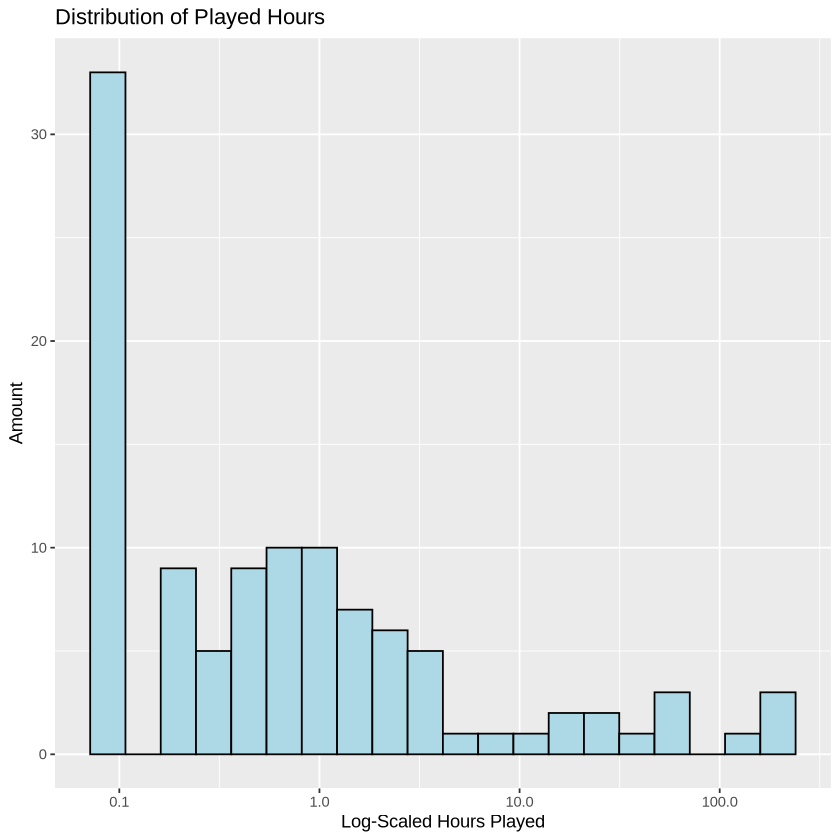

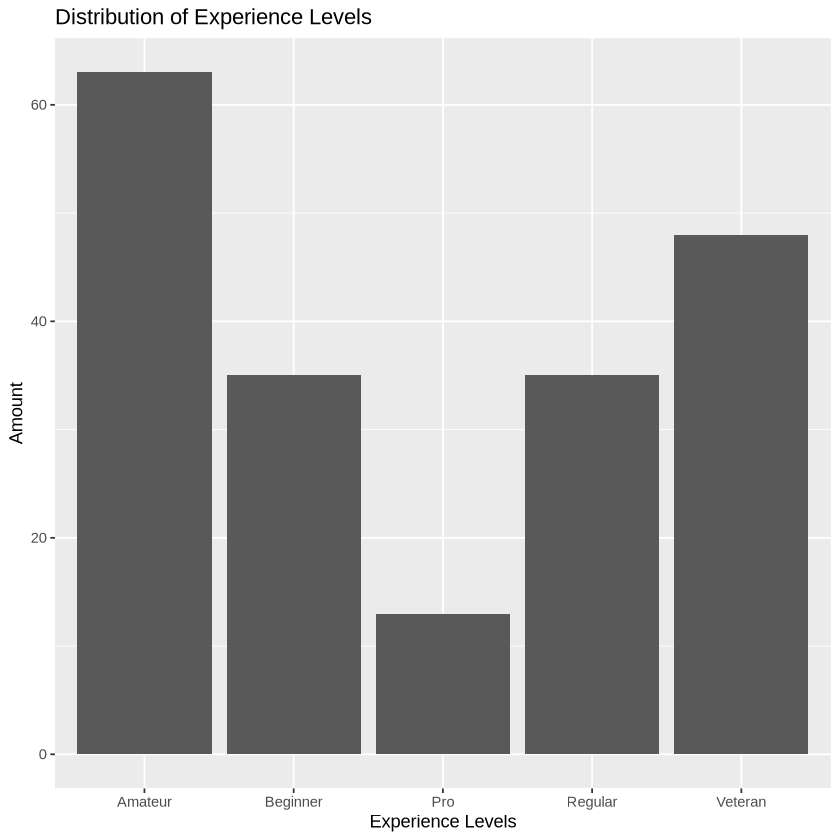

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 85 rows containing non-finite outside the scale range (`stat_bin()`).”


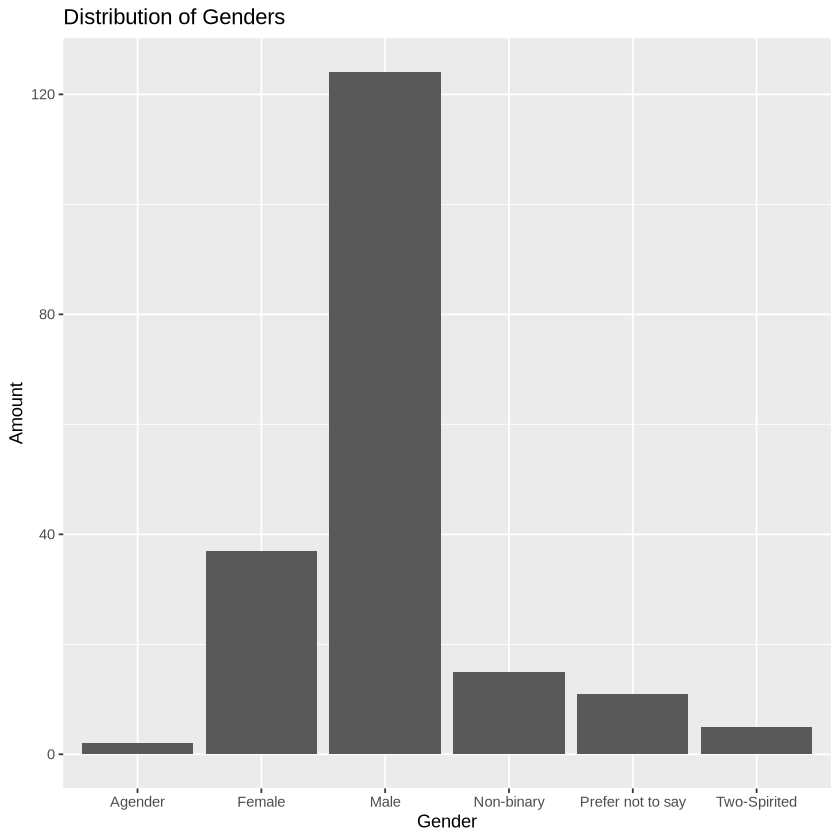

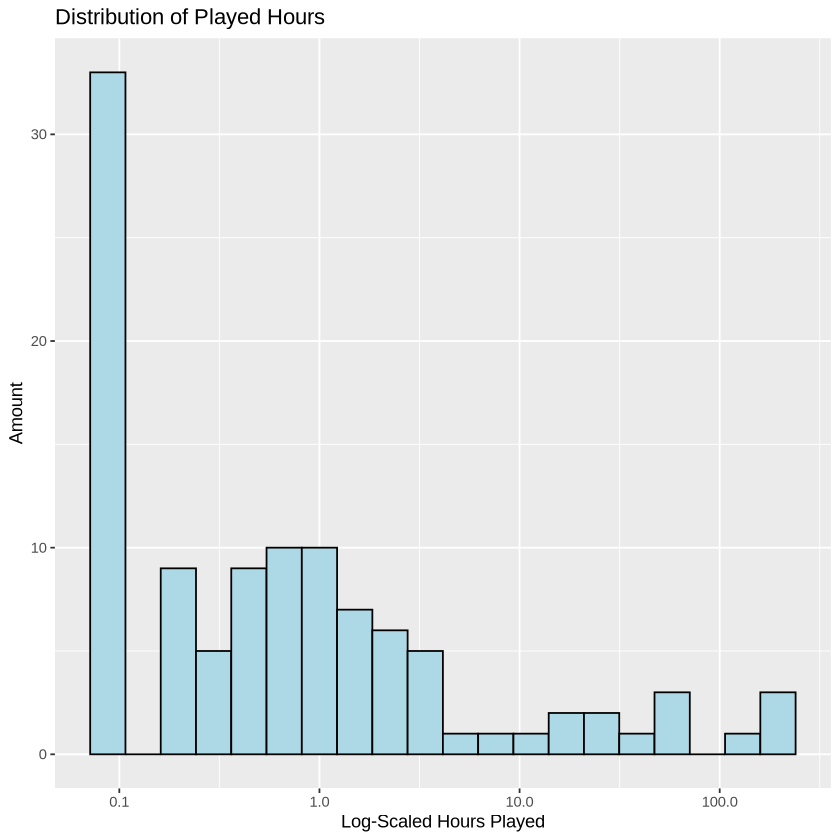

In [10]:
# Histogram of Hours Played
histogram_hours <-  players |> 
    ggplot(aes(x = played_hours)) +
      geom_histogram(bins = 20, color = "black", fill = "lightblue") +
      scale_x_log10() +
      labs(title = "Distribution of Played Hours", x = "Log-Scaled Hours Played", y = "Amount")

histogram_hours


experience_level <- players |>
    ggplot(aes(x = experience)) + 
    geom_bar() + 
    labs(title = "Distribution of Experience Levels", x = "Experience Levels", y = "Amount")

experience_level

genders <- players |>
    ggplot(aes(x = gender)) + 
    geom_bar() + 
    labs(title = "Distribution of Genders", x = "Gender", y = "Amount")

genders

histogram_hours <- players |> 
  ggplot(aes(x = played_hours)) +
  geom_histogram(bins = 20, color = "black", fill = "lightblue") +
  scale_x_log10() + #Scaled by Log because otherwise it is super skewed with 0 being very tall and the rest being small
  labs(title = "Distribution of Played Hours", x = "Log-Scaled Hours Played", y = "Amount")

histogram_hours

**Method and Planning**

I looked ahead in the textbook and clustering would be a good method for this question. This seems like a correct approach as using this data structure I can identify clusters that represent peak usage times which would be used for demand forcasting.      

Limitations: I think the data should be distributed with minimal noise so that the cluisters are clear. I would need to handle outliers (for instance someone who left his game running for a whole day), and interpratibility depending on the noise level might be difficult. This method also does not account for days of the week which are more busy (weekends) so it might still need to be altered. 

I will compare models using techniques from class like cross validation and by just looking at the distribution. 

I would clean the data so that it I can extract the hour information from each play session then I would plot it with the number of simultaneous players during each session. I would use a training and testing dataset by splitting the data. I will split the data after cleaning and extracting the hours data point I will split it like in class with a seventy percent training and thirty percent testing proportion. I will also use cross-validation to choose parameters.  